# generate dataset

In [1]:
from scripts.get_top_stocks import *


top_stocks_long, top_stocks_long_short = generate_top_stocks_df()
common_top_stocks = get_common_top_stocks(top_stocks_long, top_stocks_long_short)


Results saved to 'top_30_stocks_long_only.csv' and 'top_30_stocks_long_short.csv'

Detailed metrics for top stock (Long-Only Strategy) SMCI:
Final Close Price: 284.26
60-day Return: 250.61%
Average Hourly Volatility: 0.6678
Average Sharpe Ratio: 1.6242
Average Hourly Volume: 355714

num common_top_stocks:  35


In [2]:
# specify variables for dataset generation

start_date = '2023-01-01'
end_date = '2024-08-01'
interval = "1h"
trading_days_per_year = 252
hours_per_day = 6.5

In [3]:
from scripts.generate_dataset_features import *


df = get_all_stock_features_df(
    stocks_list=common_top_stocks,
    start_date=start_date,
    end_date=end_date,
    interval=interval,
    trading_days_per_year=trading_days_per_year, 
    hours_per_day=hours_per_day
)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

# training

In [4]:
print(df.shape)
df.head()

(89580, 81)


,Datetime,Open,High,Low,Close,Adj Close,Volume,Log_Return,EMAVolumeDiff2,SMAVolumeDiff2,...,Momentum256,PriceVolatilityHourly,MACD8,MACD16,MACD32,MACD64,MACD128,MACD256,FamaFrenchMktReturns,Log_Return_shift
0,2023-02-24 13:30:00-05:00,320.904999,321.799988,319.989990,321.404999,321.404999,530458,0.001386,-0.116420,-0.095175,...,0.954659,0.809998,41.912267,3.150640,1.032289,0.570622,0.191657,-0.033432,-1.09,0.001850
1,2023-02-24 14:30:00-05:00,321.450012,323.359985,320.540009,322.000000,322.000000,878589,0.001850,0.118021,0.247068,...,0.961194,1.000000,-27.853376,7.227446,1.499312,0.703916,0.226752,-0.026723,-1.09,-0.004389
2,2023-02-24 15:30:00-05:00,321.994995,322.450012,319.500000,320.589996,320.589996,1193520,-0.004389,0.128488,0.151986,...,0.961657,1.000000,9.110977,4.700844,1.571762,0.741702,0.242226,-0.017820,-1.09,0.009407
3,2023-02-27 09:30:00-05:00,322.019989,325.100006,322.000000,323.619995,323.619995,972490,0.009407,-0.028355,-0.102045,...,0.965987,1.000000,-3.117648,-6.272997,4.796152,1.157187,0.321401,-0.011802,0.31,-0.001036
4,2023-02-27 10:30:00-05:00,323.619995,323.649994,320.700012,323.285004,323.285004,494813,-0.001036,-0.254236,-0.325548,...,0.962430,1.000000,-11.194340,-14.642423,5.157137,1.285338,0.353104,-0.003246,0.31,-0.001858


In [88]:
df

,Datetime,Open,High,Low,Close,Adj Close,Volume,Log_Return,EMAVolumeDiff2,SMAVolumeDiff2,...,Momentum256,PriceVolatilityHourly,MACD8,MACD16,MACD32,MACD64,MACD128,MACD256,FamaFrenchMktReturns,Log_Return_shift
0,2023-02-24 13:30:00-05:00,320.904999,321.799988,319.989990,321.404999,321.404999,530458,0.001386,-0.116420,-0.095175,...,0.954659,0.809998,41.912267,3.150640,1.032289,0.570622,0.191657,-0.033432,-1.09,0.001850
1,2023-02-24 14:30:00-05:00,321.450012,323.359985,320.540009,322.000000,322.000000,878589,0.001850,0.118021,0.247068,...,0.961194,1.000000,-27.853376,7.227446,1.499312,0.703916,0.226752,-0.026723,-1.09,-0.004389
2,2023-02-24 15:30:00-05:00,321.994995,322.450012,319.500000,320.589996,320.589996,1193520,-0.004389,0.128488,0.151986,...,0.961657,1.000000,9.110977,4.700844,1.571762,0.741702,0.242226,-0.017820,-1.09,0.009407
3,2023-02-27 09:30:00-05:00,322.019989,325.100006,322.000000,323.619995,323.619995,972490,0.009407,-0.028355,-0.102045,...,0.965987,1.000000,-3.117648,-6.272997,4.796152,1.157187,0.321401,-0.011802,0.31,-0.001036
4,2023-02-27 10:30:00-05:00,323.619995,323.649994,320.700012,323.285004,323.285004,494813,-0.001036,-0.254236,-0.325548,...,0.962430,1.000000,-11.194340,-14.642423,5.157137,1.285338,0.353104,-0.003246,0.31,-0.001858
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2484,2024-07-29 10:30:00-04:00,109.360001,109.639999,107.150002,107.700996,107.700996,2197887,-0.015195,-0.078022,-0.193577,...,0.852807,1.000000,0.506024,0.494306,1.222067,1.984718,1.419039,0.440091,0.68,0.007299
2485,2024-07-29 11:30:00-04:00,107.699997,108.864998,107.180000,108.489998,108.489998,1378893,0.007299,-0.195460,-0.228975,...,0.862778,0.684998,-3.640773,3.392195,3.787634,3.905409,1.964403,0.519431,0.68,-0.004811
2486,2024-07-29 12:30:00-04:00,108.500000,108.790001,107.940002,107.969299,107.969299,749110,-0.004811,-0.300357,-0.295950,...,0.855948,-0.150002,2.202480,1.362356,2.154633,2.823557,1.741360,0.502685,0.68,0.001441
2487,2024-07-29 13:30:00-04:00,107.959999,108.510002,107.830002,108.125000,108.125000,772035,0.001441,-0.114223,0.015071,...,0.856368,-0.320000,-131.094366,3.674342,3.452541,3.615576,1.968118,0.540104,0.68,-0.000416


In [5]:
df.columns

Index(['Datetime', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Log_Return', 'EMAVolumeDiff2', 'SMAVolumeDiff2', 'EMACloseDiff2',
       'SMACloseDiff2', 'VWAP2', 'VolatilityStdDev2', 'Volatility2',
       'Momentum2', 'EMAVolumeDiff4', 'SMAVolumeDiff4', 'EMACloseDiff4',
       'SMACloseDiff4', 'VWAP4', 'VolatilityStdDev4', 'Volatility4',
       'Momentum4', 'EMAVolumeDiff8', 'SMAVolumeDiff8', 'EMACloseDiff8',
       'SMACloseDiff8', 'VWAP8', 'VolatilityStdDev8', 'Volatility8',
       'Momentum8', 'EMAVolumeDiff16', 'SMAVolumeDiff16', 'EMACloseDiff16',
       'SMACloseDiff16', 'VWAP16', 'VolatilityStdDev16', 'Volatility16',
       'Momentum16', 'EMAVolumeDiff32', 'SMAVolumeDiff32', 'EMACloseDiff32',
       'SMACloseDiff32', 'VWAP32', 'VolatilityStdDev32', 'Volatility32',
       'Momentum32', 'EMAVolumeDiff64', 'SMAVolumeDiff64', 'EMACloseDiff64',
       'SMACloseDiff64', 'VWAP64', 'VolatilityStdDev64', 'Volatility64',
       'Momentum64', 'EMAVolumeDiff128', 'SMAVolum

In [6]:
target = "Log_Return_shift"
features = df.columns[8:-1]
len(features)

72

In [173]:
X = df[features].to_numpy()
y = df[target].to_numpy()
X.shape,y.shape

((89580, 72), (89580,))

In [174]:
from scripts.train_predict import *

# X_train,y_train,X_val,y_val,X_test,y_test = train_val_test_split(X, y, 0.8, 0.1, 0.1)
X_train,y_train,X_val,y_val,X_test,y_test = shuffle_train_val_test_split(X, y)
X_train.shape,y_train.shape,X_val.shape,y_val.shape,X_test.shape,y_test.shape

((64497, 72), (64497,), (16125, 72), (16125,), (8958, 72), (8958,))

In [36]:
# Initialize transformations
# Important note: do standard scaling first before PCA
scaler = StandardScaler()
selector = SelectKBest(f_regression, k=10)
pca = PCA(n_components = 0.95)

# Fit the scaler on the training data and transform the training data
X_train = scaler.fit_transform(X_train)
X_train = selector.fit_transform(X_train, y_train)
X_train = pca.fit_transform(X_train)

# Transform the validation data
X_val = scaler.transform(X_val)
X_val = selector.transform(X_val)
X_val = pca.transform(X_val)

# Transform the test data
X_test = scaler.transform(X_test)
X_test = selector.transform(X_test)
X_test = pca.transform(X_test)

# cols_idxs = selector.get_support(indices=True)
# features_df_new = X[:train_size].iloc[:,cols_idxs]
# features_df_new

X_train.shape,y_train.shape,X_val.shape,y_val.shape,X_test.shape,y_test.shape

((64497, 8), (64497,), (16125, 8), (16125,), (8958, 8), (8958,))

In [177]:
def train():
    # initialise training params
    best_score = float('inf')
    best_params = None
    best_model = None
    

    # Define the parameter grid
    param_grid = {
        # 'hidden_layer_sizes': [(8,), (16,), (32,), (64,), (64,8), (64,16,), (32,8), (16,8), (8,16,), (8,64,)], # Different architectures
        # 'activation': ['relu', 'tanh'], # Different activation functions
        # 'solver': ['adam', 'sgd'], # Different solvers
        # 'alpha': [0.0001, 0.001], # Different regularization terms
        # 'learning_rate': ['constant', 'adaptive'], # Different learning rates
        # 'hidden_layer_sizes': [(8,64), (8,4), (8,2), (4,2),(2),(1),(4)], # Different architectures
        'hidden_layer_sizes': [(6, 8, 64, 1), (64, 1)], # Different architectures
        # 'hidden_layer_sizes': [(8,64), (16,64), (32,64), (32, 128)], # Different architectures
        'activation': ['tanh'], # Different activation functions
        'solver': ['adam'], # Different solvers
        'alpha': [0.0005], # Different regularization terms
        'learning_rate': ['adaptive'], # Different learning rates
    }

    for params in alive_it(ParameterGrid(param_grid)):
        model = MLPRegressor(max_iter=1000, **params) # initialise new model before each run
        model.fit(X_train, y_train)
        y_pred = model.predict(X_val)
        score = mean_squared_error(y_val, y_pred)
        
        if score < best_score:
            best_score = score
            best_params = params
            best_model = model
            print(f"score: {round(best_score,7)}")
            # print(f"score: {round(best_score,7)}, params: {best_params}")

    print(f"Best parameters found: {best_params}")
    print(f"Best validation score: {round(best_score,5)}")

    return best_model, best_params, best_score, X_test, y_test

def predict(best_model, X_test, y_test):
    y_pred = best_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    print(f"Test set mean squared error: {round(mse, 5)}")
    print(f"Test set mean absolute error: {round(mae, 5)}")
    
    return y_pred

def train_predict():
    best_model, best_params, best_score, X_test, y_test = train()
    y_pred = predict(best_model, X_test, y_test)
    
    plt.plot(y_test,label='test groundtruth')
    plt.plot(y_pred,label='test predictions')
    plt.title(target)
    plt.legend()
    plt.show()
    
    return best_model, best_params, best_score, y_pred

on 0: score: 0.0001109
|████████████████████████████████████████| 2/2 [100%] in 11.5s (0.17/s) 
Best parameters found: {'activation': 'tanh', 'alpha': 0.0005, 'hidden_layer_sizes': (6, 8, 64, 1), 'learning_rate': 'adaptive', 'solver': 'adam'}
Best validation score: 0.00011
Test set mean squared error: 0.00012
Test set mean absolute error: 0.00617


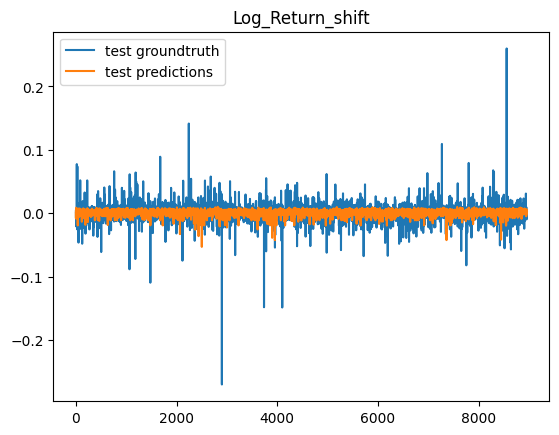

Percentage of prediction with correct signal direction: 0.4992185755749051


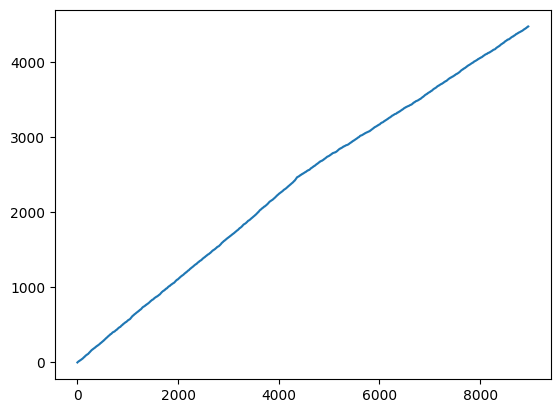

In [179]:
best_model, best_params, best_score, y_pred = train_predict()

output = []
cumsum = []
for i, v in enumerate(y_pred):
    output.append((y_test[i], y_pred[i]))

output.sort()

total_correct = 0
for x, y in output:
    total_correct += x * y >= 0
    cumsum.append(total_correct)

pct_correct_direction = cumsum[-1] / len(output)
print(f"Percentage of prediction with correct signal direction: {pct_correct_direction}")
plt.plot(cumsum)

on 0: score: 0.000138
|████████████████████████████████████████| 1/1 [100%] in 3.0s (0.34/s) 
Best parameters found: {'activation': 'tanh', 'alpha': 0.001, 'hidden_layer_sizes': 64, 'learning_rate': 'adaptive', 'solver': 'adam'}
Best validation score: 0.00014
Test set mean squared error: 0.00014
Test set mean absolute error: 0.00718


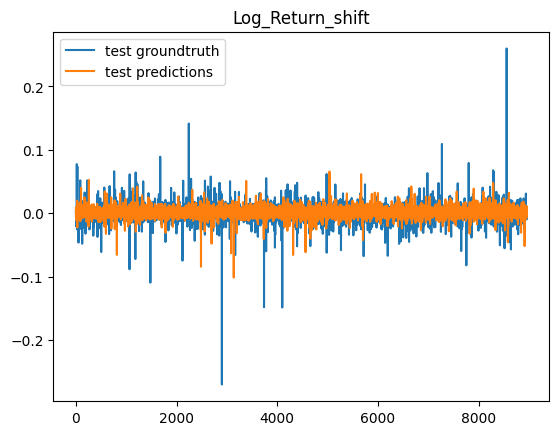

Percentage of prediction with correct signal direction: 0.5058048671578478


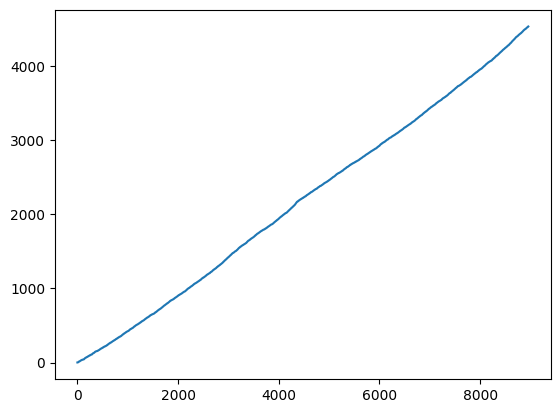

In [150]:
best_model, best_params, best_score, y_pred = train_predict()

output = []
cumsum = []
for i, v in enumerate(y_pred):
    output.append((y_test[i], y_pred[i]))

output.sort()

total_correct = 0
for x, y in output:
    total_correct += x * y >= 0
    cumsum.append(total_correct)

pct_correct_direction = cumsum[-1] / len(output)
print(f"Percentage of prediction with correct signal direction: {pct_correct_direction}")
plt.plot(cumsum)

on 0: score: 0.0001386
|████████████████████████████████████████| 1/1 [100%] in 8.3s (0.12/s) 
Best parameters found: {'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': 512, 'learning_rate': 'adaptive', 'solver': 'adam'}
Best validation score: 0.00014
Test set mean squared error: 0.00015
Test set mean absolute error: 0.00778


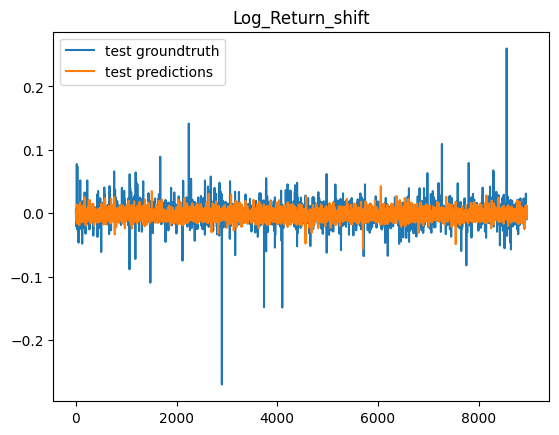

Percentage of prediction with correct signal direction: 0.5037954900647466


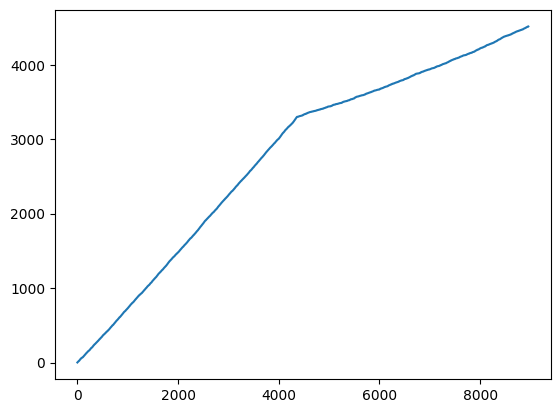

In [96]:
best_model, best_params, best_score, y_pred = train_predict()

output = []
cumsum = []
for i, v in enumerate(y_pred):
    output.append((y_test[i], y_pred[i]))

output.sort()

total_correct = 0
for x, y in output:
    total_correct += x * y >= 0
    cumsum.append(total_correct)

pct_correct_direction = cumsum[-1] / len(output)
print(f"Percentage of prediction with correct signal direction: {pct_correct_direction}")
plt.plot(cumsum)

on 0: score: 0.000141
|████████████████████████████████████████| 1/1 [100%] in 3.2s (0.31/s) 
Best parameters found: {'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': 128, 'learning_rate': 'adaptive', 'solver': 'adam'}
Best validation score: 0.00014
Test set mean squared error: 0.00015
Test set mean absolute error: 0.00766


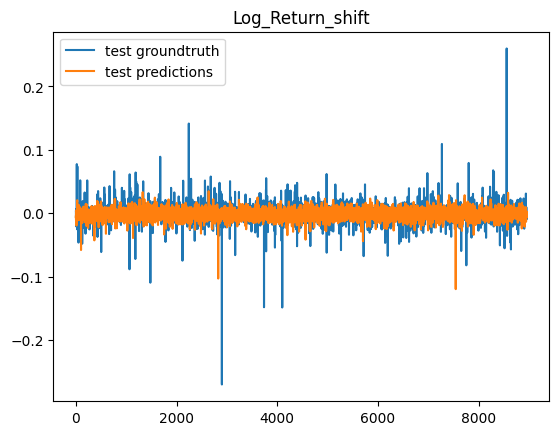

Percentage of prediction with correct signal direction: 0.4986604152712659


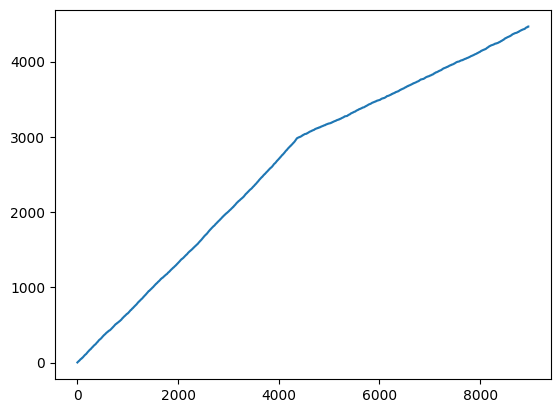

In [87]:
best_model, best_params, best_score, y_pred = train_predict()

output = []
cumsum = []
for i, v in enumerate(y_pred):
    output.append((y_test[i], y_pred[i]))

output.sort()

total_correct = 0
for x, y in output:
    total_correct += x * y >= 0
    cumsum.append(total_correct)

pct_correct_direction = cumsum[-1] / len(output)
print(f"Percentage of prediction with correct signal direction: {pct_correct_direction}")
plt.plot(cumsum)

on 0: score: 0.0001438
|████████████████████████████████████████| 1/1 [100%] in 2.4s (0.41/s) 
Best parameters found: {'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': 64, 'learning_rate': 'adaptive', 'solver': 'adam'}
Best validation score: 0.00014
Test set mean squared error: 0.00015
Test set mean absolute error: 0.00754


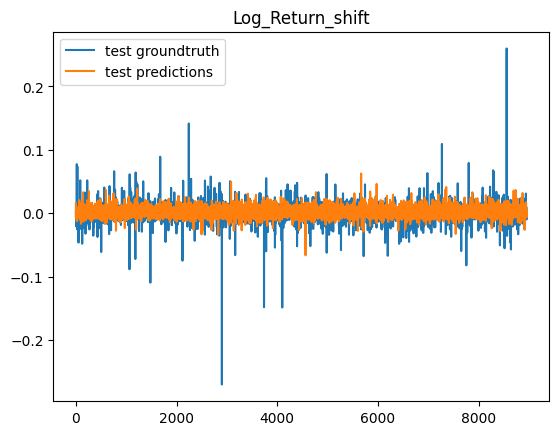

Percentage of prediction with correct signal direction: 0.5108283098906006


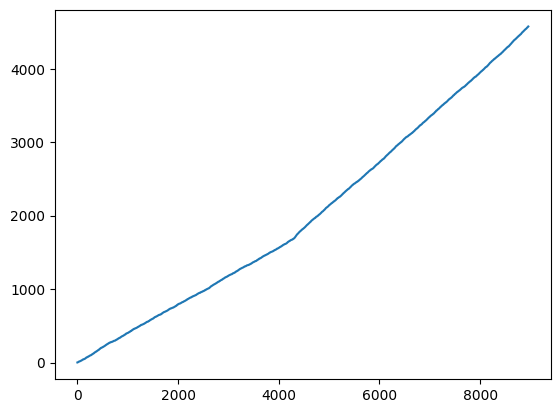

In [64]:
best_model, best_params, best_score, y_pred = train_predict()

output = []
cumsum = []
for i, v in enumerate(y_pred):
    output.append((y_test[i], y_pred[i]))

output.sort()

total_correct = 0
for x, y in output:
    total_correct += x * y >= 0
    cumsum.append(total_correct)

pct_correct_direction = cumsum[-1] / len(output)
print(f"Percentage of prediction with correct signal direction: {pct_correct_direction}")
plt.plot(cumsum)

In [151]:
X_train.shape,y_train.shape,X_val.shape,y_val.shape,X_test.shape,y_test.shape

((64497, 8), (64497,), (16125, 8), (16125,), (8958, 8), (8958,))

In [153]:
    # Define the parameter grid
    param_grid = {
        # 'hidden_layer_sizes': [(8,), (16,), (32,), (64,), (64,8), (64,16,), (32,8), (16,8), (8,16,), (8,64,)], # Different architectures
        # 'activation': ['relu', 'tanh'], # Different activation functions
        # 'solver': ['adam', 'sgd'], # Different solvers
        # 'alpha': [0.0001, 0.001], # Different regularization terms
        # 'learning_rate': ['constant', 'adaptive'], # Different learning rates
        # 'hidden_layer_sizes': [(8,64), (8,4), (8,2), (4,2),(2),(1),(4)], # Different architectures
        'hidden_layer_sizes': [(64)], # Different architectures
        # 'hidden_layer_sizes': [(8,64), (16,64), (32,64), (32, 128)], # Different architectures
        'activation': ['tanh'], # Different activation functions
        'solver': ['adam'], # Different solvers
        'alpha': [0.001], # Different regularization terms
        'learning_rate': ['adaptive'], # Different learning rates
    }

In [165]:
from tqdm import tqdm

ValueError: x and y must have same first dimension, but have shapes (1593,) and (1592,)

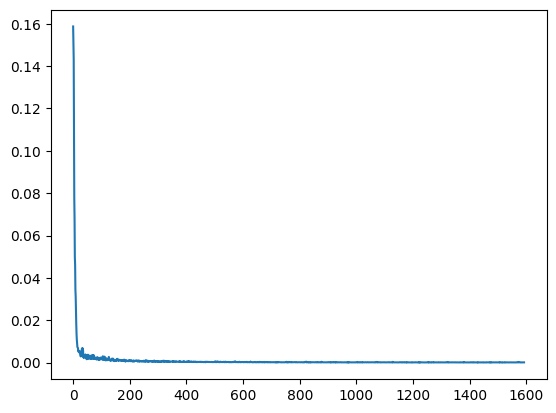

In [167]:
# # manual training of the sklearn MLP Regressor

# batch_size = 256
# # Define the parameter grid
# params = {
#     'hidden_layer_sizes': (64), # Different architectures
#     # 'hidden_layer_sizes': [(8,64), (16,64), (32,64), (32, 128)], # Different architectures
#     'activation': 'tanh', # Different activation functions
#     'solver': 'adam', # Different solvers
#     'alpha': 0.001, # Different regularization terms
#     'learning_rate': 'adaptive', # Different learning rates
# }

# reg = MLPRegressor(**params) # initialise new model before each run

# train_loss_=[]
# valid_loss_=[]
# for _ in tqdm(range(150)):
#     for b in range(batch_size, len(y_train), batch_size):
#         X_batch, y_batch = X_train[b-batch_size:b], y_train[b-batch_size:b]
#         reg.partial_fit(X_batch, y_batch)
#         train_loss_.append(reg.loss_)
#         valid_loss_.append(mean_squared_error(y_val, reg.predict(X_val) / 2))

plt.plot(range(len(train_loss_)), train_loss_, label="train loss")
plt.plot(range(len(train_loss_)), valid_loss_, label="validation loss")
plt.legend()

# check features-target plot

In [32]:
X_train.shape

(71659, 8)

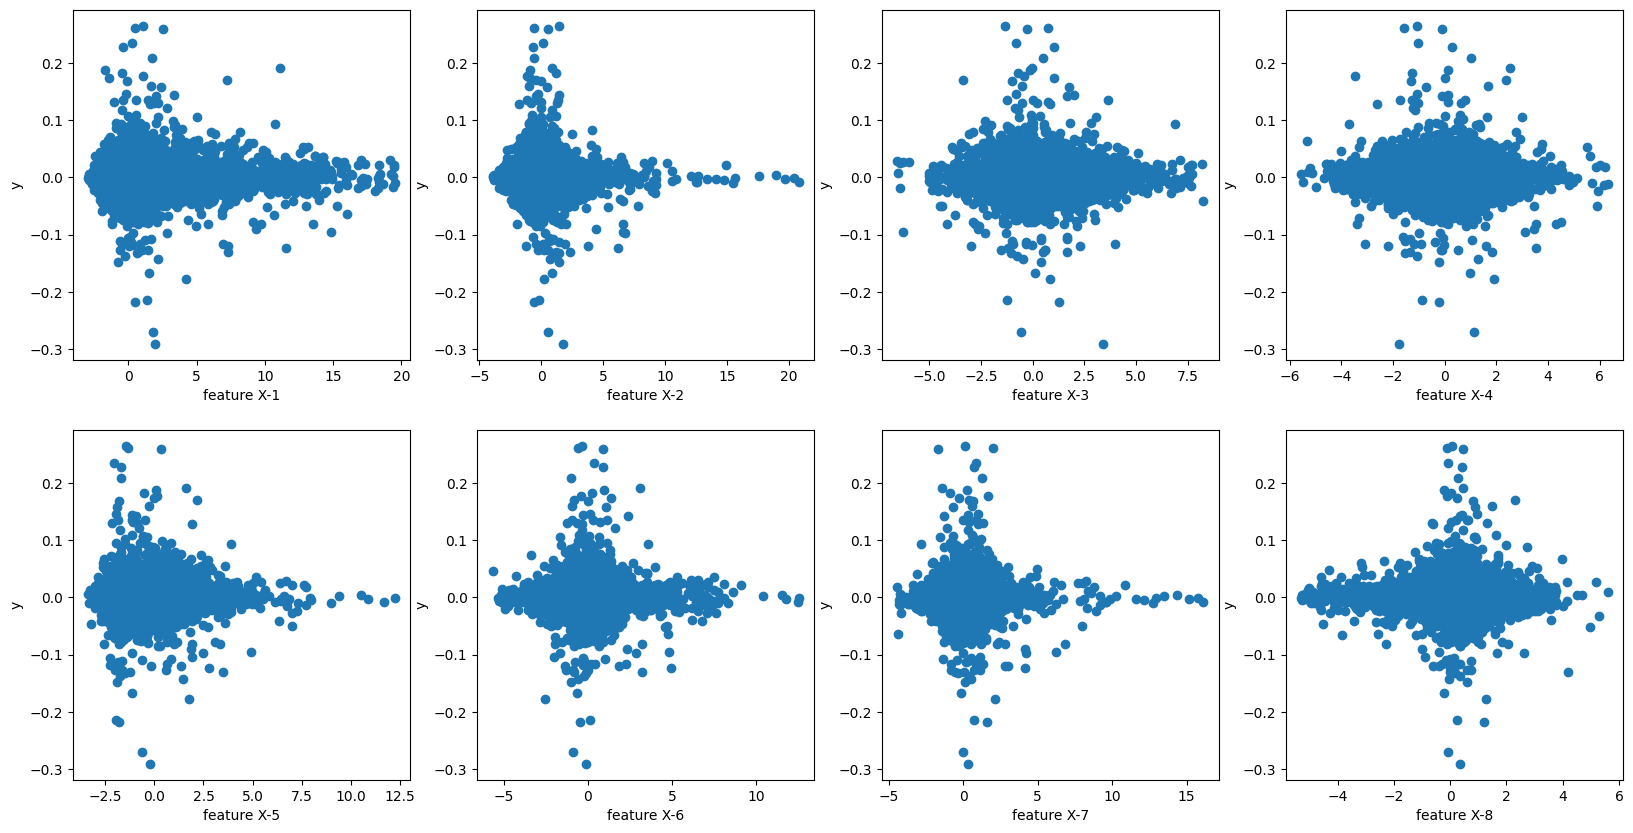

In [42]:
fig,ax=plt.subplots(2,4,figsize=(20,10))

for i in range(X_train.shape[1]):
    plt.subplot(2,4,i+1)
    plt.scatter(X_train[:,i],y_train)
    plt.xlabel(f"feature X-{i+1}")
    plt.ylabel("y")
plt.show()

# linear regression

In [44]:
X_train.shape,y_train.shape,X_val.shape,y_val.shape,X_test.shape,y_test.shape

((71659, 8), (71659,), (8957, 8), (8957,), (8958, 8), (8958,))

In [46]:
import numpy as np
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X_train, y_train)
print(reg.score(X_train, y_train))
print(reg.coef_)
print(reg.intercept_)

preds = reg.predict(X_test)
mean_squared_error(y_test,preds)

0.007020053711372265
[ 7.10034706e-05 -1.06527123e-04 -3.27981379e-04 -6.77937927e-04
  1.08510523e-04  2.38035590e-04 -2.72654973e-04  1.94445732e-04]
0.00022684529360667328


0.00010192187153137008

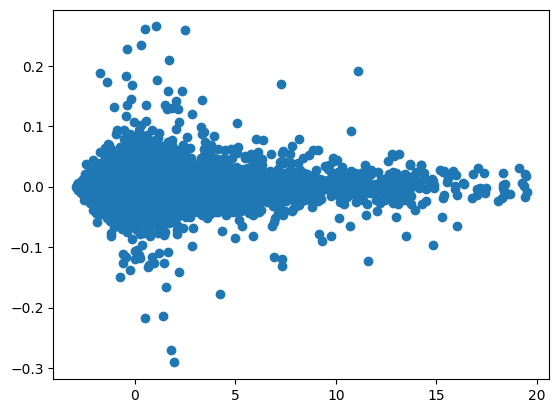

In [48]:
plt.scatter(X_train[:,0],y_train)

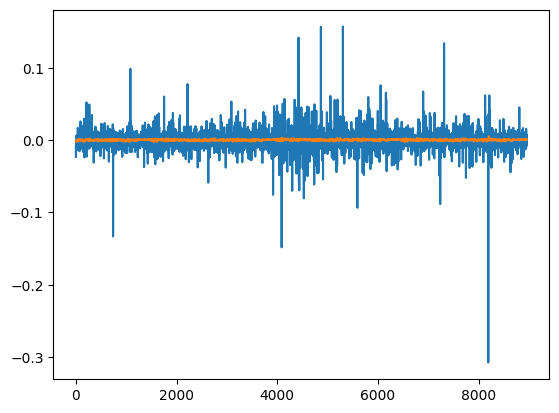

In [50]:
plt.plot(y_test)
plt.plot(preds)

# kernel regression

In [52]:
X_train.shape,y_train.shape,X_val.shape,y_val.shape,X_test.shape,y_test.shape

((71659, 8), (71659,), (8957, 8), (8957,), (8958, 8), (8958,))

In [ ]:
from sklearn.kernel_ridge import KernelRidge
import numpy as np

krr = KernelRidge(alpha=1.0)
krr.fit(X_train, y_train)

In [ ]:
krr.score(X_train,y_train),krr.score(X_val,y_val)

In [ ]:
krr.get_params()

In [ ]:
preds = krr.predict(X_test)